<P> <img src="https://i.ibb.co/gyNf19D/nhslogo.png" alt="nhslogo" border="0" width="100" align="right"><font size="6"><b> CS4132 Data Analytics</b> </font>

# Lab 7.2: Data Exploration II (Multivariate Data)

Complete the following questions and upload your `.ipynb` file to Coursemology.

Name the file in the following format:

`Lab<Num><YourName>.ipynb`

## Q1

Manatees are large, gentle sea creatures that live along the Florida coast. Many manatees are killed or injured by powerboats. The data on powerboat registrations (in thousands) and the number of manatees killed by boats in Florida in the years 1977 to 1990 is given below:

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = (16.0, 8.0)

import scipy as sp
import scipy.special as sc, scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

c:\users\prannaya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("Lab7iiQ1.csv")
df

,Year,Powerboat Registration,Manatees Killed
0,1977,447,13
1,1978,460,21
2,1979,481,24
3,1980,498,16
4,1981,513,24
5,1982,512,20
6,1983,526,15
7,1984,559,34
8,1985,585,33
9,1986,614,33



In the following codes, I have added some functions I painstakingly researched and coded with 2 shots of coffee at 3 am.

#### Gamma Function

$$\Gamma(x) = \int_{0}^{\infty} t^{x-1} e^{-t} dt$$

Based on some simple manipulation, we get the following equations:
$$\Gamma(x) = \frac{1}{x} t^x e^{-t}|_{0}^{\infty} - \dfrac{1}{x}\int_{0}^{\infty} t^{x} (- e^{-t})dt$$
$$= 0 + \dfrac{1}{x}\int_{0}^{\infty} t^{x} ( e^{-t})dt$$
$$= \dfrac{1}{x}\displaystyle\int_{0}^{\infty} t^{x} ( e^{-t})\,dt =\dfrac{1}{x}\Gamma (x + 1)$$
$$\implies \Gamma (x + 1) = x\Gamma (x)$$
$$\Gamma (x) = \int_{0}^{\infty} t^{x - 1}e^{-t}dt$$
$$\implies \Gamma (1) = \int_{0}^{\infty} t^{1 - 1}e^{-t}dt = \int_{0}^{\infty} e^{-t}\,dt =(-e^{-t})|_{0}^{\infty} = 1$$

Therefore, we can see the following pattern:

$$\Gamma (1 + 1) = (1) \times \Gamma (1) = 1 \implies \Gamma (2) = 1!$$
$$\Gamma (1 + 2) = (2) \times \Gamma(2) = 2 \implies \Gamma (3) = 2!$$
$$\Gamma (1 + 3) = (3) \times \Gamma(3) = 6 \implies \Gamma (4) = 3!$$
$$\vdots$$
$$\Gamma (n+1) = n! \implies \Gamma (n) = (n-1)!$$

Since the actual factorial only takes in integers, we must introduce a gamma function with 1/2.

Hence, we can compute some more to get
$$\Gamma(\frac{1}{2}) = \sqrt{\pi}$$

#### Beta Function

$$\beta (x, y) = \int_0^1 t^{x-1} (1-t)^{y-1} dt = \frac{\Gamma(x) \Gamma(y)}{\Gamma(x+y)} $$

##### Incomplete Beta Function
The **incomplete beta function**, a generalization of the beta function, is defined as
$$B(x;\,a,b) = \int_0^x t^{a-1}\,(1-t)^{b-1}\,dt$$

##### Regularised Incomplete Beta Function
From this, we also introduce the concept of the **regularised incomplete beta function**, as shown below
$$I_x(a,b) = \frac{B(x;\,a,b)}{\beta(a,b)}$$

Some, actual values are as below:
$$I_0(a,b) = 0$$
$$I_1(a,b) = 1$$
$$I_x(a,1) = x^a$$
$$I_x(1,b) = 1 - (1-x)^b$$
$$I_x(a,b) = 1 - I_{1-x}(b,a)$$
$$I_x(a,b) = I_x(a-1,b)-\frac{x^{a-1} (1-x)^b}{(a-1) \beta(a-1,b)}$$
$$I_x(a,b) = I_x(a,b-1)+\frac{x^a(1-x)^{b-1}}{(b-1) \beta(a,b-1)}$$

From here, you can define a simplified recursive function to compute the regularised incomplete beta function.

#### Pearson R Correlation Coefficient
First off, let take a dataset which has been normalised, i.e $$\bar x = \bar y = 0$$
This can be achieved by subtracting each values by the mean, i.e $$x_i := x_i - \bar x$$

From here, computing the Pearson R Correlation Coefficient is not very intensive.
$$r = \frac{\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x_i \sum_{i=1}^n y_i}} $$

#### The P Value
From here, we can also compute the P Value using the previous two functions.
It is simply given by:
$$p(r) = 2 I_{\frac{1 - |r|}{2}}(\frac{n}{2} - 1, \frac{n}{2} - 1)$$
where n is the number of samples.

In [3]:
# Functions I painstakingly researched and coded with 2 shots of coffee at 3 am

def gamma(n):
    """
    A Simplified Gamma Function for "powers" of 1/2
    Gamma Function for Integers are given by: Γ(n) = (n-1)!
    Gamma Function for Values ending with 1/2: Γ(n) = 0.5 * 1.5 * ... * (n-1) * √(π)
    
    Gamma Function is generally given by the following expression
    """
    return np.arange(1 - (n%1), n).prod() * np.pi ** (n%1)

def beta(x, y):
    """
    Actual Beta Function based on the Simplified Gamma Function above.
    """
    return gamma(x)*gamma(y)/gamma(x+y)

def I(x, a, b):
    if gamma(a) == np.inf or gamma(b) == np.inf or gamma(a+b) == 0: return 0
    if x == 0 or x == 1: return x
    if b == 1: return x ** a
    if a == 1: return 1 - (1-x)**b
    if b > 1: return I(x, a, b-1) + (x**a * (1-x)**(b-1))/((b-1)*beta(a, b-1))
    if a > 1: return I(x, a-1, b) - (x**(a-1) * (1-x)**b)/((a-1)*beta(a-1, b))
    return ((-1)**a) * I(x/(x-1), a, 1-a-b) * beta(a, 1-a-b)


def correlation(data):
    norm = data - data.mean(axis=0)
    return norm.prod(axis=1).sum() / np.sqrt((norm**2).sum(axis=0).prod())

def p(r, n):
    return 2*I((1-abs(r))/2, n/2-1, n/2-1)

def pearson(data):
    r, n = correlation(data), data.shape[0]
    return r, p(r, n)
    
def pearsonr(x, y):
    x, y = x - x.mean(axis=0), y - y.mean(axis=0)
    r = (x.T @ y).sum(axis=0) / np.sqrt(((x**2).sum(axis=0) * (y**2).sum(axis=0)))
    p_val = 2 * np.vectorize(lambda r: p(r, x.shape[0]/2-1))(r)
    return np.stack((r, p_val), axis=len(r.shape))

a) Draw a relevant scatterplot of these data.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Scatterplot of Manatees Killed vs Powerboat Registration'}, xlabel='Powerboat Registration', ylabel='Manatees Killed'>

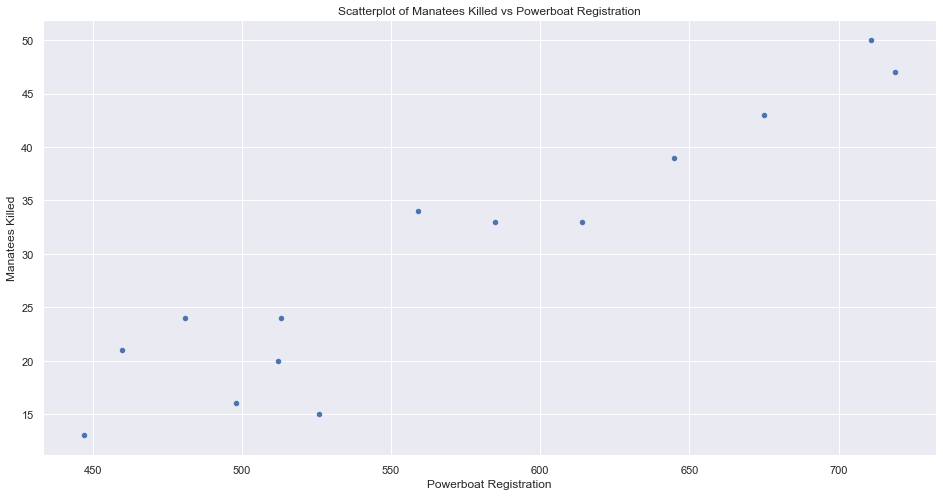

In [4]:
df.plot.scatter(x="Powerboat Registration", y="Manatees Killed", title="Scatterplot of Manatees Killed vs Powerboat Registration")

b) Find the correlation between number of powerboat registration and number of manatees killed. Conclude your findings.

In [5]:
data = df[["Powerboat Registration", "Manatees Killed"]].values
print("Mathematical Pearson Correlation Coefficient: %s\nMathematical p-value: %s\n" % pearson(data))
print("SciPy's Pearson Correlation Coefficient: %s\nSciPy's p-value: %s\n" % sp.stats.pearsonr(data[:,0], data[:, 1]))

Mathematical Pearson Correlation Coefficient: 0.9414772887893056
Mathematical p-value: 5.109061143430003e-07

SciPy's Pearson Correlation Coefficient: 0.9414772887893057
SciPy's p-value: 5.109061143429946e-07



Correlation coefficient:
- Close to `+1`: Large positive relationship
- Close to `-1`: Large negative relationship
- Close to `0`: No relationship

P-Value:
- `< 0.001`: Strong certainty in the result
- `< 0.05`: Moderate certainty in the result
- `< 0.1`: Weak certainty in the result
- `> 0.1`: No certainty in the result

We define strong correlation as:
- Correlation coefficient close to `1` or `-1`
- P-Value less than `0.001`

c) Describe your findings from (a) and (b).

Based on (a), we can note that the seems to be a relative linear relationship, especially at the higher values from 650 to 700.
Based on (b), we note a large positive relationship since the Pearson Correlation Coefficient is very close to +1, whilst we also note a strong certainty in the result since the p-value is less that 0.001. This overall shows a strong correlation.

d) Plot a regression line for on the scatterplot.

Text(0.5, 1.0, 'Regression Plot of Manatees Killed against Powerboat Registration')

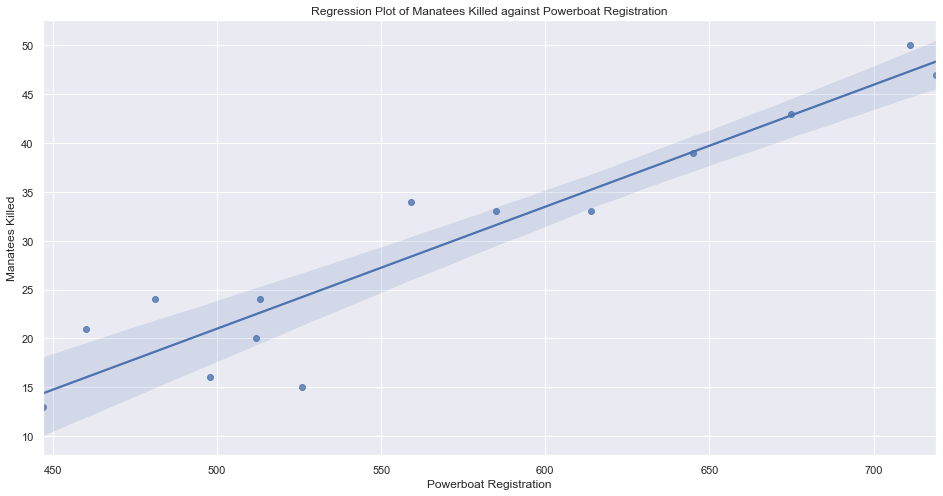

In [6]:
sns.regplot(x="Powerboat Registration", y="Manatees Killed", data=df).set_title("Regression Plot of Manatees Killed against Powerboat Registration")

e) Create a pairplot for the data given.

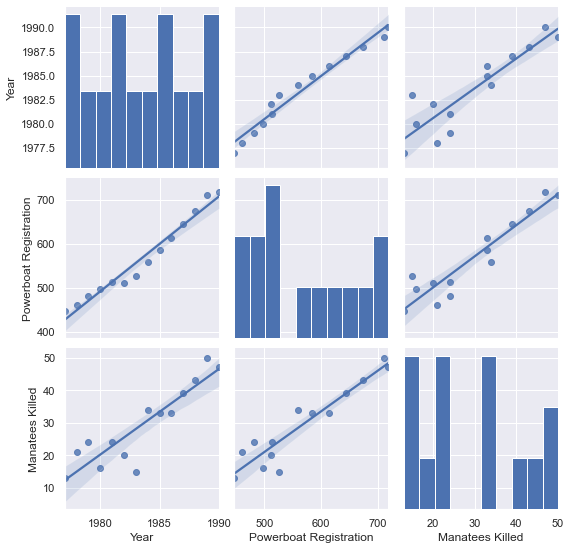

In [7]:
sns.pairplot(df, kind="reg")

## Q2

In this question, we will use the World Happiness Report, which is a survey about the state of global happiness. The data is imported as follows:

In [8]:
import pandas as pd
import numpy as np
data = pd.read_csv('Lab7iiQ2.csv', index_col=0)
data.sort_values(['Year', "Happiness Score"], ascending=[True, False], inplace=True)
data.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
141,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
60,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
38,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
108,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
25,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


Below is a short description of what each column means:
<ul>
<li><strong>Happiness Score:&nbsp;</strong>A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."</li>
<li><strong>Economy (GDP per Capita):&nbsp;</strong>The extent to which GDP contributes to the calculation of the Happiness Score.</li>
<li><strong>Family:&nbsp;</strong>The extent to which Family contributes to the calculation of the Happiness Score</li>
<li><strong>Health (Life Expectancy):&nbsp;</strong>The extent to which Life expectancy contributed to the calculation of the Happiness Score</li>
<li><strong>Freedom:&nbsp;</strong>The extent to which Freedom contributed to the calculation of the Happiness Score.</li>
<li><strong>Trust (Government Corruption):&nbsp;</strong>The extent to which Perception of Corruption contributes to Happiness Score.</li>
<li>
<div class="sc-kMZwpj dFFZuK"><strong><span class="sc-fznzOf sc-fznMnq sc-jRYQbI hmtEvs">Generosity:&nbsp;</span></strong><span class="sc-fznzOf sc-fznMnq sc-jRYQbI hmtEvs">The extent to which Generosity contributed to the calculation of the Happiness Score.</span></div>
</li>
<li>
<div class="sc-jRqDgO sc-kHIeKe eHkdKd">
<div class="sc-kMZwpj dFFZuK"><span class="sc-fznzOf sc-fznMnq sc-jRYQbI hmtEvs"><strong>Dystopia Residual:&nbsp;</strong>The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.</span></div>
</div>
<div class="sc-jRqDgO sc-kHIeKe eHkdKd">&nbsp;</div>
</li>
</ul>

a) Perform relevant EDA to answer the following question:

Which of the six variables ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity'] most affect a country’s “happiness”? Justify your answer.

,pearsonR,Correlation
Economy (GDP per Capita),0.785450,0.785450
Family,0.636532,0.636532
Health (Life Expectancy),0.748040,0.748040
Freedom,0.560353,0.560353
Trust (Government Corruption),0.406340,0.406340
Generosity,0.163562,0.163562


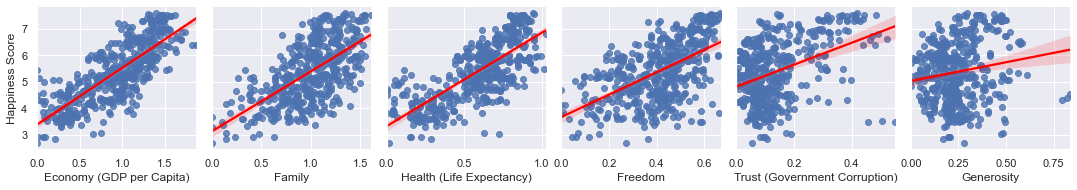

In [9]:
index = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity']
nonnull = data.dropna()
sns.pairplot(nonnull, x_vars=index, y_vars="Happiness Score", kind="reg", plot_kws={'line_kws':{'color':'red'}})
corr = pd.DataFrame(pearsonr(nonnull[["Happiness Score"]].values, nonnull[index].values), columns=["pearsonR", "p_val"], index=index)[["pearsonR"]].join(data.corr().loc[index, ["Happiness Score"]]).rename(columns={"Happiness Score": "Correlation"})
corr

Based on the Pearson Correlation Coefficient Values, the **Economy (GDP per Capita)** has the strongest correlation. Hence, it affects a country's "happiness" the most.

b) Find each factor's correlation with the overall happiness score. Store the data in a dataframe.

In [10]:
corr[["pearsonR"]]

,pearsonR
Economy (GDP per Capita),0.785450
Family,0.636532
Health (Life Expectancy),0.748040
Freedom,0.560353
Trust (Government Corruption),0.406340
Generosity,0.163562


c) Plot a bar graph to visualize the data in b)

<AxesSubplot:title={'center':'Bar Graph of Pearson Correlation Coefficient, R of Variables with respect to Happiness Score'}, ylabel='Variable'>

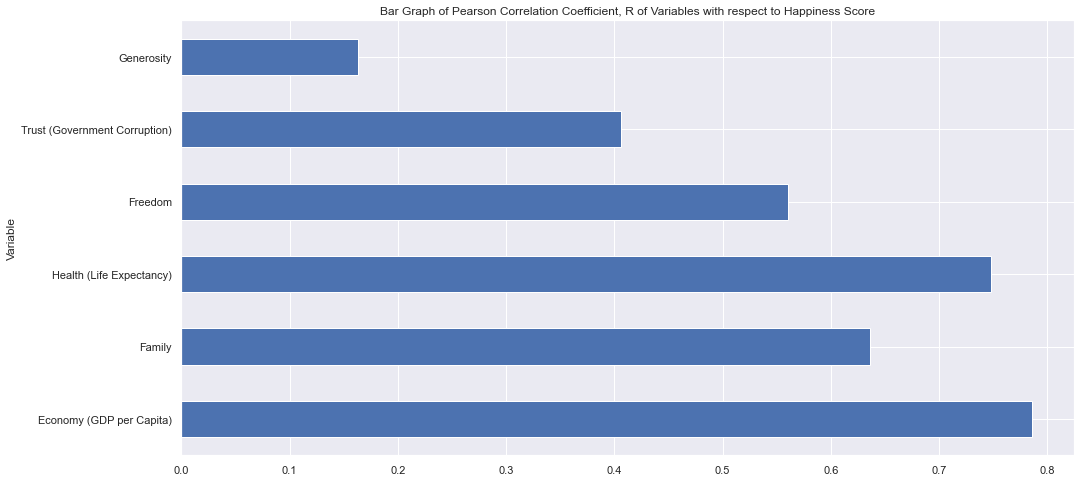

In [11]:
corr.pearsonR.plot.barh(y="pearsonR", ylabel="Pearson Correlation Coefficient, R", xlabel="Variable", title="Bar Graph of Pearson Correlation Coefficient, R of Variables with respect to Happiness Score")

d) You are to shortlist a question you wish to investigate (and not already covered above) using the data given.
Based on what you have learnt thus far, perform relevant EDA to help answer your question.
Hence, state your observations/conclusion.

(0.4897471845829413, 0)

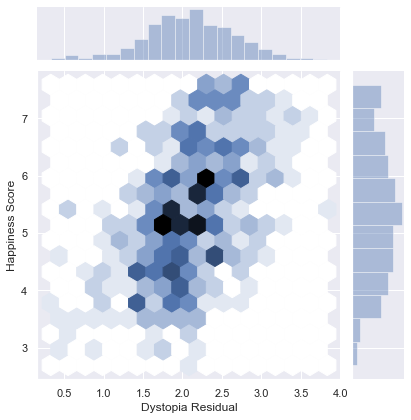

In [12]:
"""
My question: What is the relation between the Dystopia Residual and the Global Happiness Score.
"""
args = ["Happiness Score", "Dystopia Residual"]
nonnull = data.dropna(subset=args)[args]
sns.jointplot(y="Happiness Score", x="Dystopia Residual", data=nonnull, kind="hex")
pearson(nonnull.values)

The Pearson Correlation Coefficient is not very close to 1, but based on the joint plot, you can notice a clear linear streak. However, we can't make any clear conclusions since the correlation is not very distinct.

e) We discussed the pairplot in the notes. In contrast to the `sns.pairplot` function, `sns.PairGrid` is a class which means that it does not automatically fill in the plots for us. Instead, we create a class instance and then we map specific functions to the different sections of the grid. 

Read more about PairGrid and how to use it: https://seaborn.pydata.org/generated/seaborn.PairGrid.html

Plot a relevant PairGrid to visualize the data in this question.

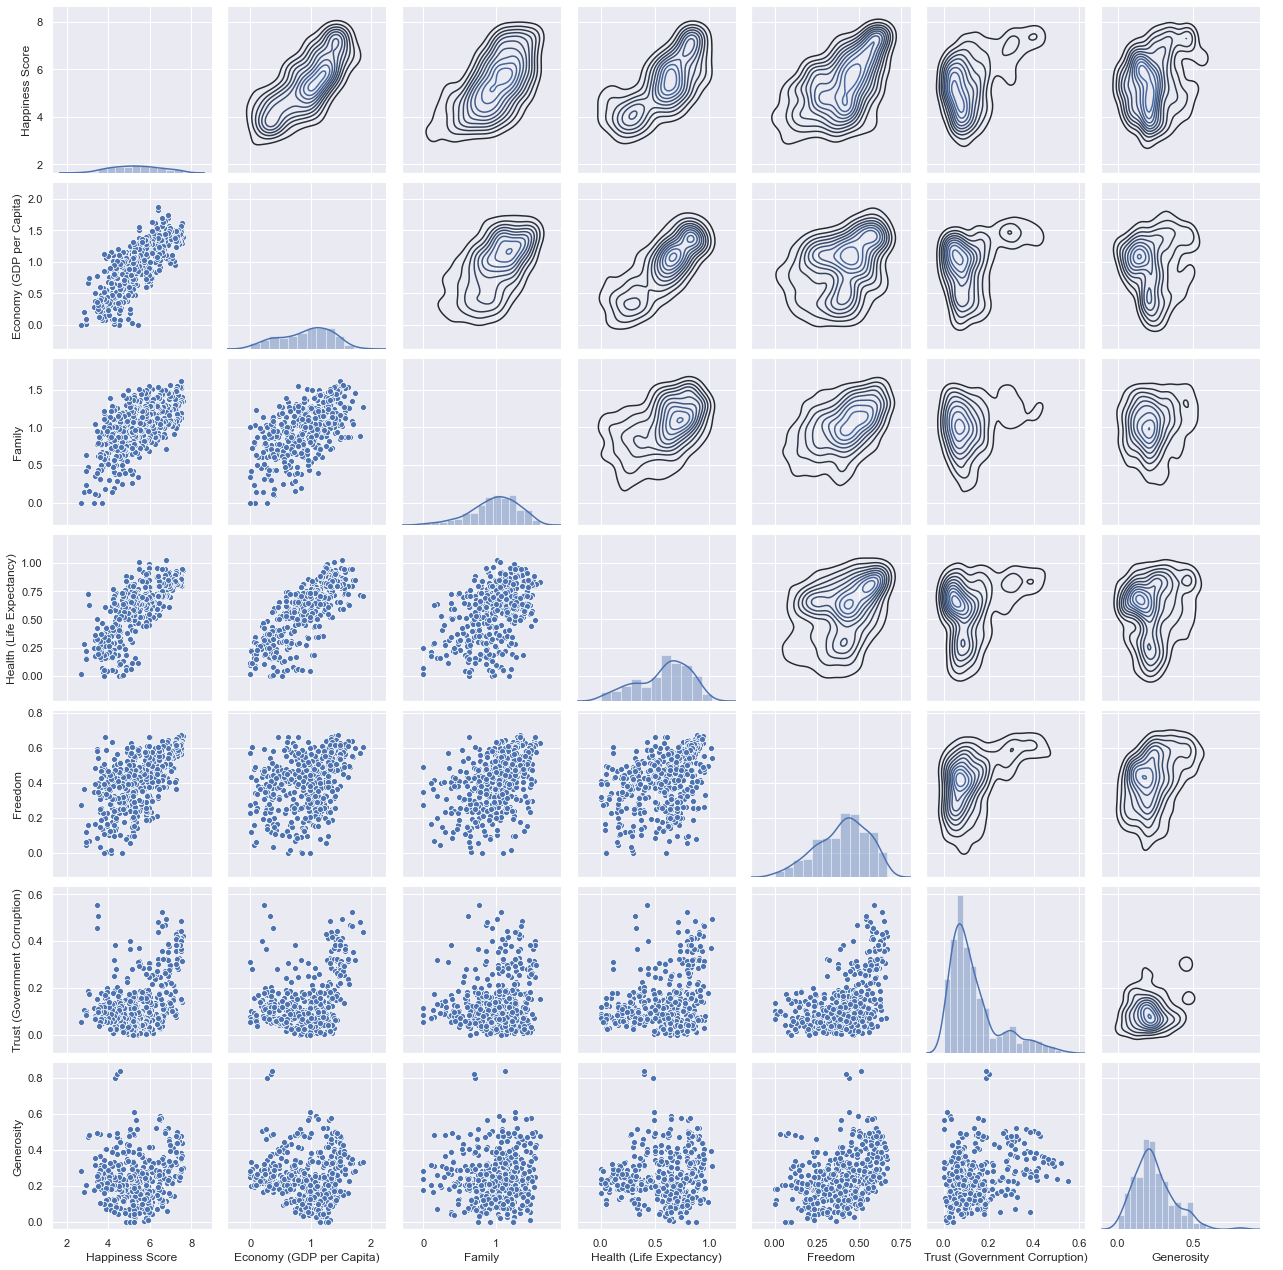

In [13]:
sns.PairGrid(data[["Happiness Score"]+index]).map_diag(sns.distplot).map_lower(sns.scatterplot).map_upper(sns.kdeplot).add_legend()

Do some customization to the PairGrid such that the diagonal will display the respective 5-number summary instead of the histogram.

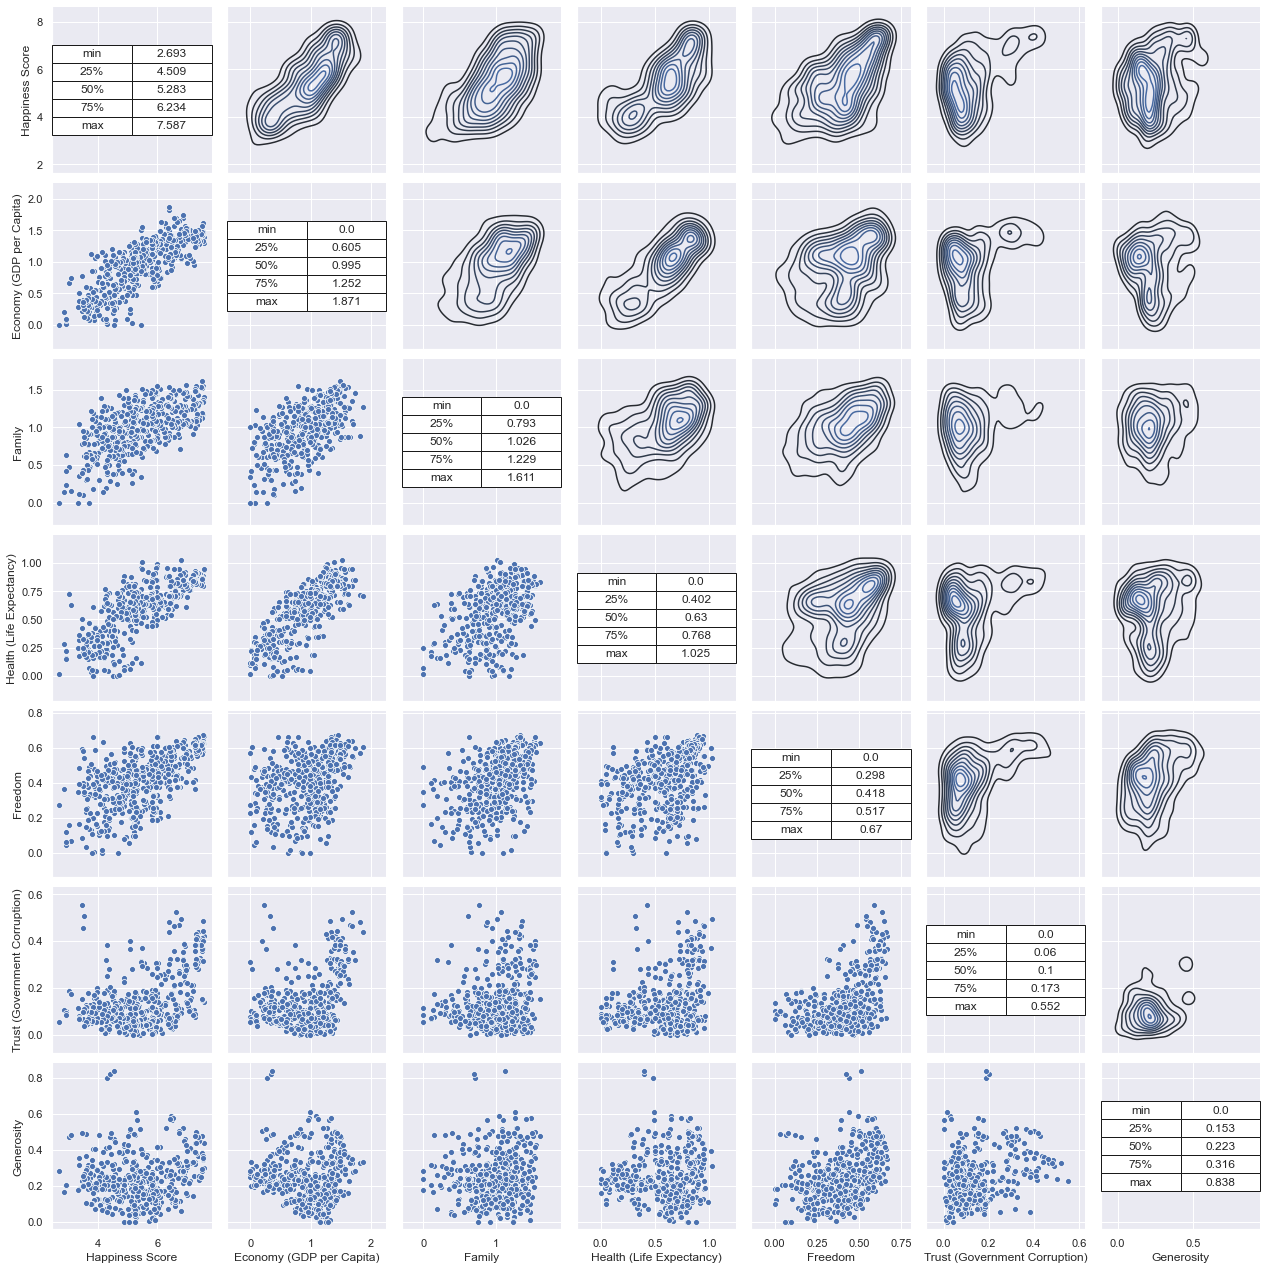

In [14]:
def annotate(data, **kws):
    ax = plt.gca()
    quartiles = pd.Series(data).describe()["min":"max"].reset_index().to_numpy()
    quartiles[:, 1] = quartiles[:, 1].astype(float).round(3)
    ax.table(cellText=quartiles, cellLoc="center", loc="center").scale(1, 1.5)

sns.PairGrid(data[["Happiness Score"]+index]).map_diag(annotate).map_lower(sns.scatterplot).map_upper(sns.kdeplot).add_legend()

f) There is another class called the `sns.FacetGrid` which maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset. 

Read more about FacetGrid and how to use it: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

Plot a relevant FacetGrid to visualize the relationship between Happiness Score and GDP by Region (row) and Year (Column).

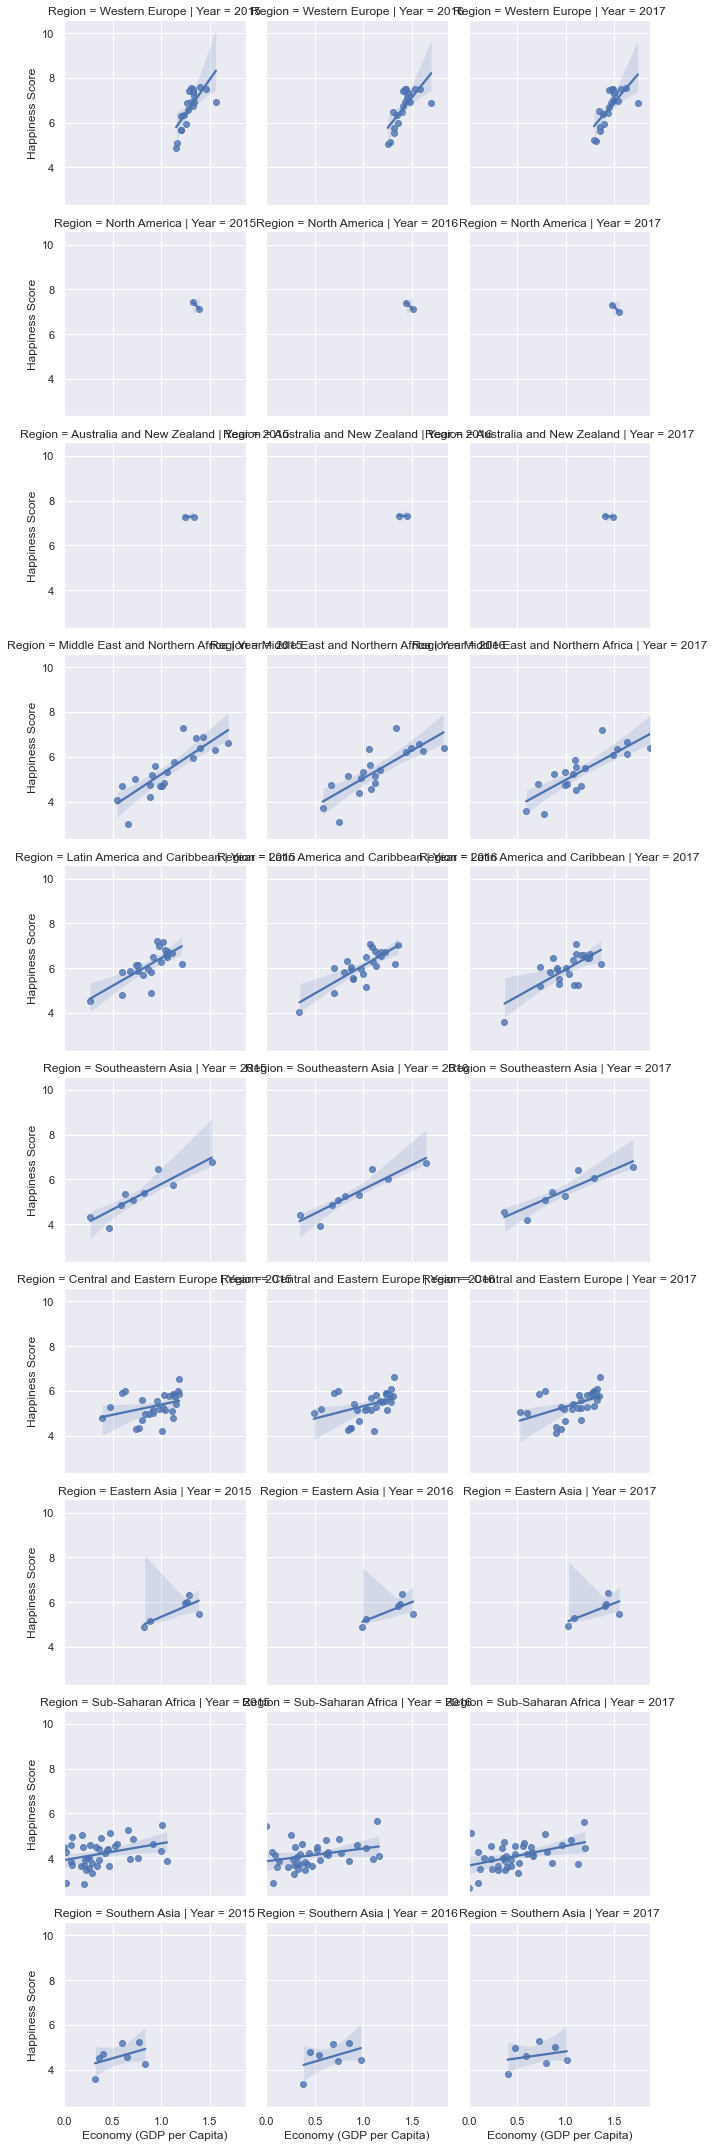

In [15]:
sns.FacetGrid(data, col="Year", row="Region").map(sns.regplot, "Economy (GDP per Capita)", "Happiness Score")

Hence, state the differences between pairplot, PairGrid and FacetGrid.

Pairplot is a less customized form of grid-like plot which maps the features against one another. Whilst you can plot different plots, like the contour KDE, scatter, hist and regression plots, there is still a limit for the customization. In the end, pairplot is just a wrapper function for the PairGrid.

The PairGrid is a way more customizable grid-like plot where in you can map seperate locations with different plotting functions, for example in the diagonal and above and below the diagonal. This allows us to avoid duplicate plots, hence you can draw the kdeplot and regplot at once.

The FacetGrid is a completely different type of plot, mapped not on the variables and their correlation but on the different values within each of 2 variables. These grids allow us to segment information based on different values and see possible patterns in that way.